### Q1

In [137]:
import pandas as pd

# load
train = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")


In [138]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [139]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [140]:
# preprocess
# don't need ID
train = train.drop('Id', axis=1)
test = test.drop('Id', axis=1)


In [141]:
cols = set(train.columns) | set(test.columns)
total = (train.index.stop+1) + (test.index.stop+1)

drop_cols = []
cat_cols = []
num_cols = []
for col in cols:
    total_null = train[col].isna().sum()
    if col in test.columns:
        total_null += test[col].isna().sum()
    if total_null:
        # print(col, total_null, train[col].dtype)

        if total_null / total > 0.5:
            drop_cols.append(col)
        elif train[col].dtype == 'object':
            cat_cols.append(col)
        else:
            num_cols.append(col)

        BsmtFinSF2  BsmtFullBath  BsmtHalfBath   GarageArea    BsmtUnfSF  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean     46.549315      0.425342      0.057534   472.980137   567.240411   
std     161.319273      0.518911      0.238753   213.804841   441.866955   
min       0.000000      0.000000      0.000000     0.000000     0.000000   
25%       0.000000      0.000000      0.000000   334.500000   223.000000   
50%       0.000000      0.000000      0.000000   480.000000   477.500000   
75%       0.000000      1.000000      0.000000   576.000000   808.000000   
max    1474.000000      3.000000      2.000000  1418.000000  2336.000000   

       GarageYrBlt  TotalBsmtSF   BsmtFinSF1   MasVnrArea  LotFrontage  \
count  1379.000000  1460.000000  1460.000000  1452.000000  1201.000000   
mean   1978.506164  1057.429452   443.639726   103.685262    70.049958   
std      24.689725   438.705324   456.098091   181.066207    24.284752   
min    1900.000000 

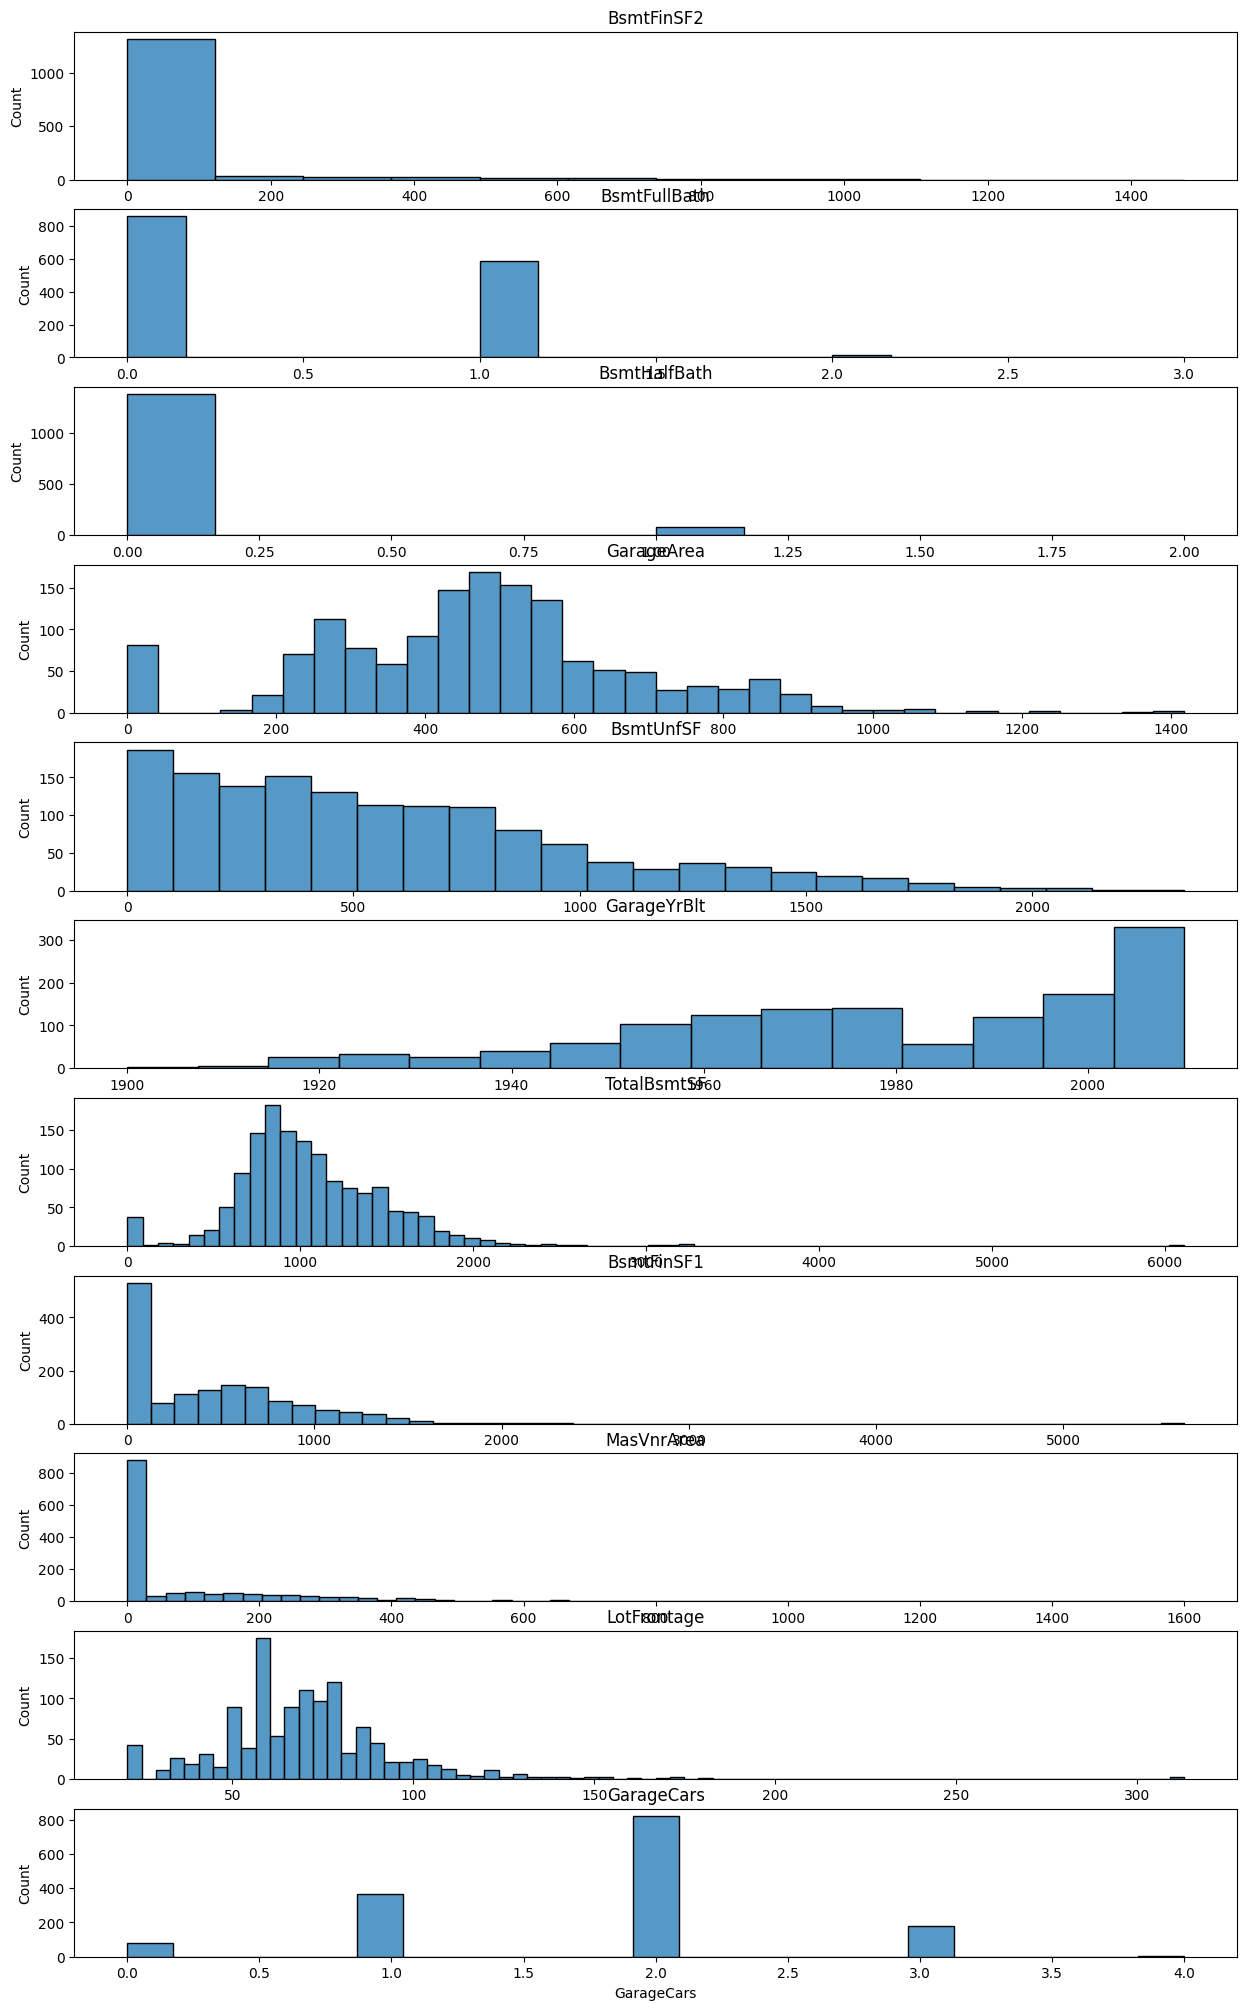

In [142]:
# individually check each column to see what imputation to use

import seaborn as sns
import matplotlib.pyplot as plt

print(train[num_cols].describe())

f = plt.figure(figsize=(15,25))
for i, col in enumerate(num_cols, 1):
    ax = f.add_subplot(len(num_cols), 1, i)
    ax.set_title(col)
    sns.histplot(train, x=col, ax=ax)
plt.show()

In [143]:
use_mean = ['GarageArea', 'TotalBsmtSF', 'LotFrontage']
use_mode = ['BsmtFinSF2', 'BsmtHalfBath', 'MasVnrArea', 'GarageCars']
use_median = [c for c in num_cols if c not in use_mean and c not in use_mode]


# need to use train stats on test
# need to fillna() test first
test = test.fillna(value={c:train[c].mean() for c in use_mean})
train = train.fillna(value={c:train[c].mean() for c in use_mean})

test = test.fillna(value={c:train[c].mode()[0] for c in use_mode})
train = train.fillna(value={c:train[c].mode()[0] for c in use_mode})

test = test.fillna(value={c:train[c].median() for c in use_median})
train = train.fillna(value={c:train[c].median() for c in use_median})

       Utilities FireplaceQu BsmtCond BsmtQual BsmtFinType1 Exterior2nd  \
count       1460         770     1423     1423         1423        1460   
unique         2           5        4        4            6          16   
top       AllPub          Gd       TA       TA          Unf     VinylSd   
freq        1459         380     1311      649          430         504   

       GarageQual KitchenQual Electrical GarageCond SaleType BsmtExposure  \
count        1379        1460       1459       1379     1460         1422   
unique          5           4          5          5        9            4   
top            TA          TA      SBrkr         TA       WD           No   
freq         1311         735       1334       1326     1267          953   

       MSZoning GarageType GarageFinish Functional BsmtFinType2 Exterior1st  
count      1460       1379         1379       1460         1422        1460  
unique        5          6            3          7            6          15  
top 

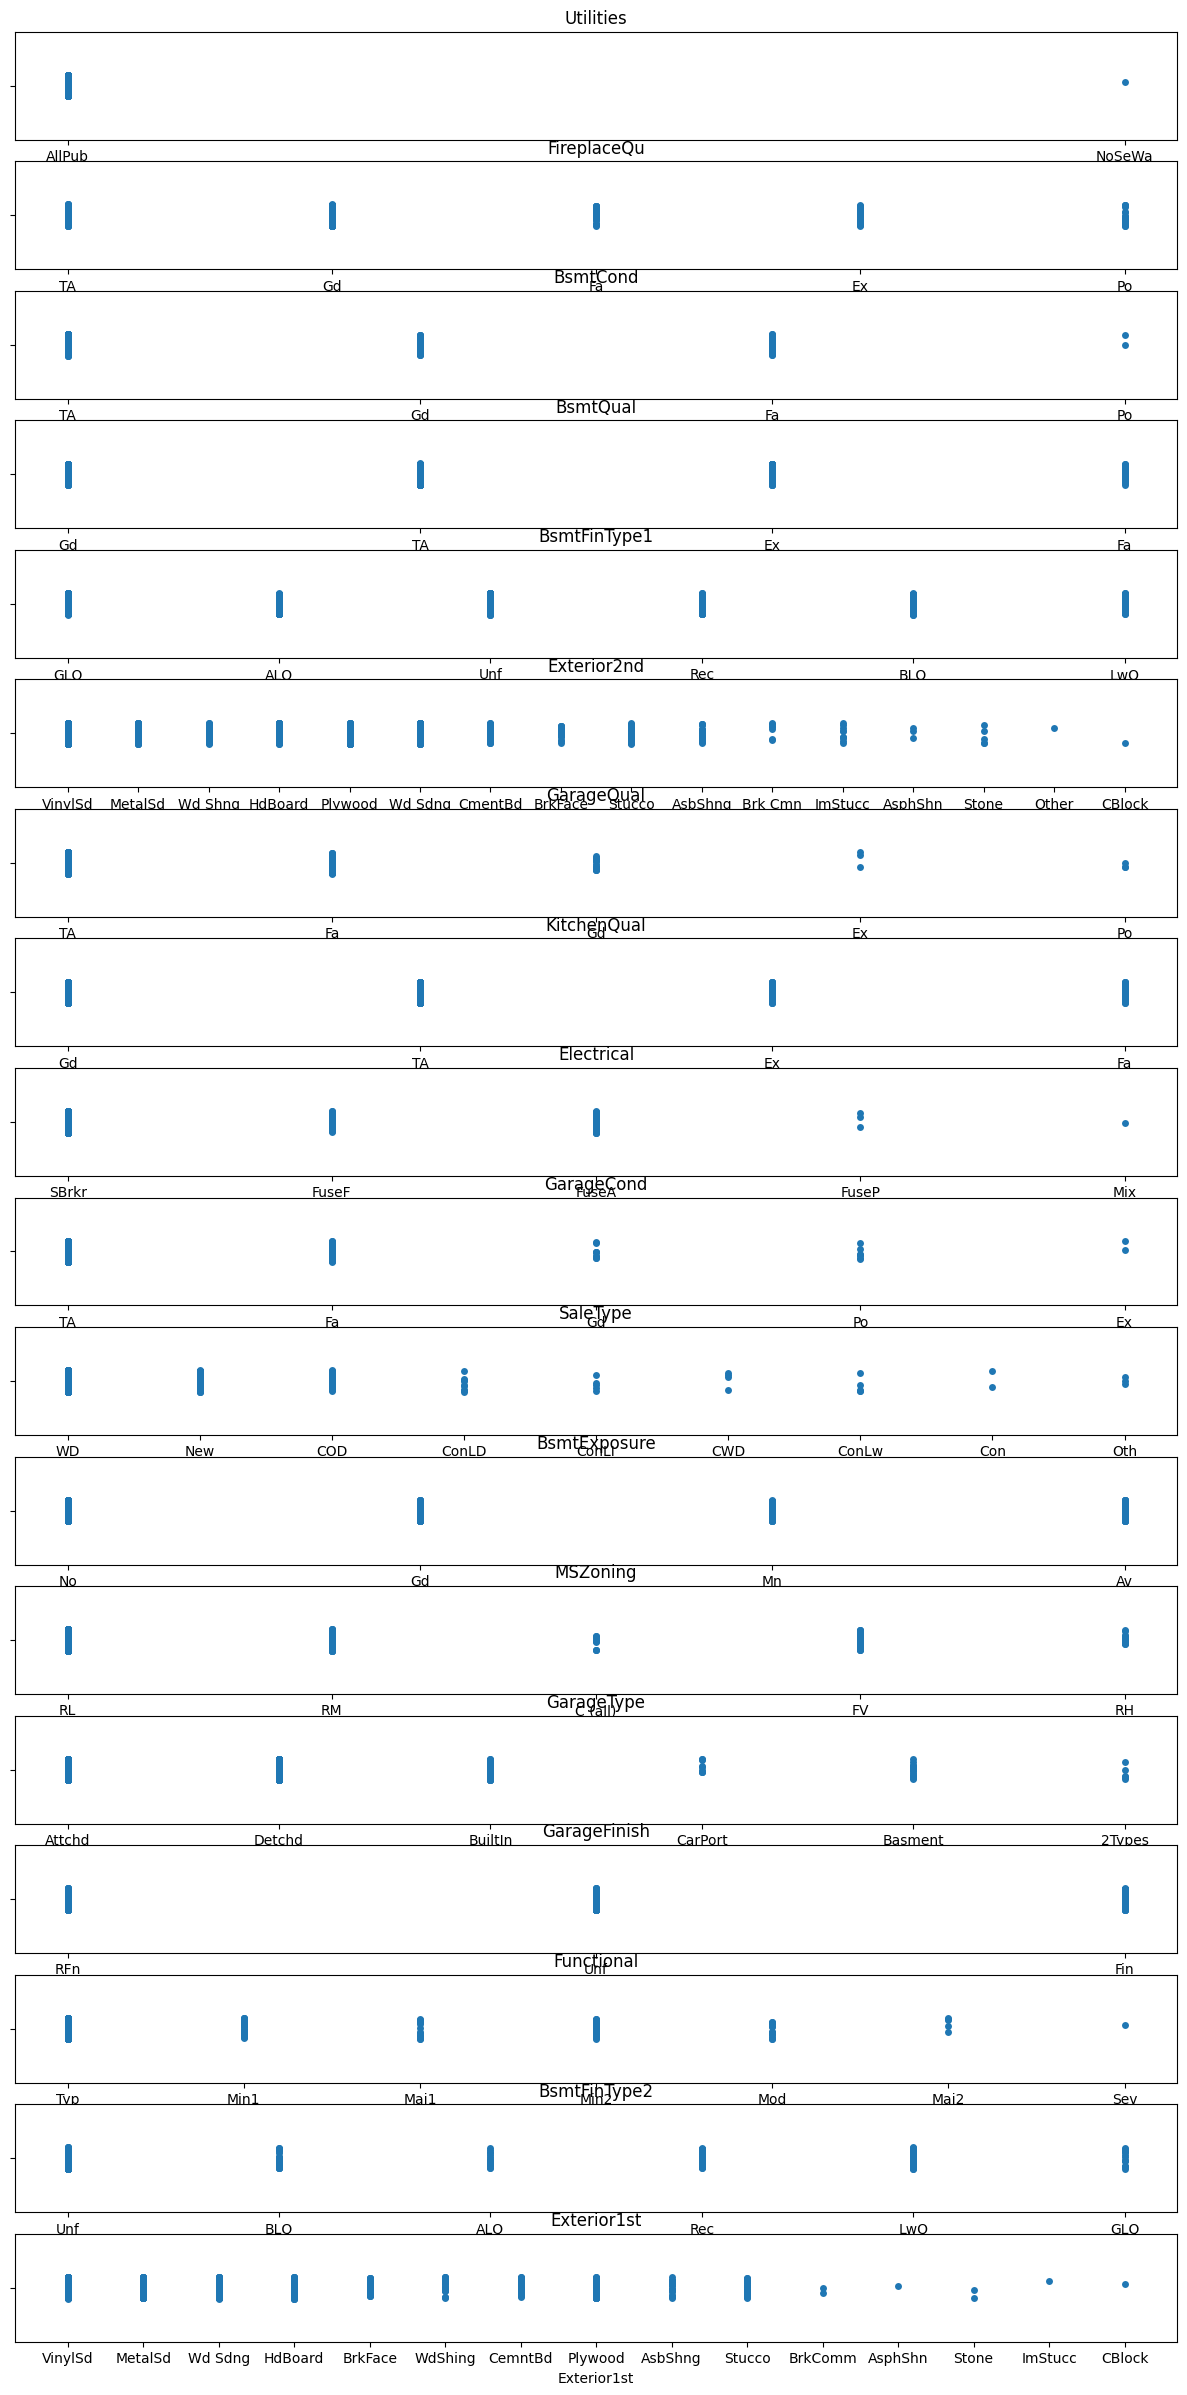

In [144]:
print(train[cat_cols].describe())

f = plt.figure(figsize=(15,30))
for i, col in enumerate(cat_cols, 1):
    ax = f.add_subplot(len(cat_cols), 1, i)
    ax.set_title(col)
    sns.stripplot(train, x=col, ax=ax)
plt.show()

In [145]:
use_mode = ['Utilities']
remaining = [c for c in cat_cols if c not in use_mode]

test = test.fillna(value={c:train[c].mode()[0] for c in use_mode})
train = train.fillna(value={c:train[c].mode()[0] for c in use_mode})

test = test.fillna(value={c:'Not Specified' for c in remaining})
train = train.fillna(value={c:'Not Specified' for c in remaining})

In [146]:
train = train.drop(drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)

In [149]:
train.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [150]:
test.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 74, dtype: int64

In [168]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, y_train = train.drop('SalePrice', axis=1), train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


std = StandardScaler()
train_numeric = X_train.select_dtypes(['number'])
test_numeric = X_test.select_dtypes(['number'])

X_train[train_numeric.columns] = std.fit_transform(train_numeric)
X_test[test_numeric.columns] = std.transform(test_numeric)


train_obj = X_train.select_dtypes(['object'])
test_obj = X_test.select_dtypes(['object'])

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# only use columns available in training
not_in_test = set(X_train.columns) - set(X_test.columns)
for c in not_in_test:
    X_test[c] = 0
X_test = X_test[X_train.columns]

In [169]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,-0.868950,0.420654,-0.030504,0.636031,0.392266,-0.032378,-0.711644,1.061372,-0.970484,-0.280335,...,False,False,False,True,False,False,False,False,True,False
1452,2.882618,-1.533770,-0.624365,-0.823057,-0.508624,1.106434,0.976164,-0.144680,0.219303,-0.280335,...,False,False,False,True,False,False,False,False,True,False
762,0.068942,0.073201,-0.185924,0.636031,-0.508624,1.236584,1.169056,-0.608547,-0.918281,-0.280335,...,False,False,False,False,False,False,False,False,True,False
932,-0.868950,0.594381,0.081645,2.095118,-0.508624,1.138972,1.024387,1.142549,-0.970484,-0.280335,...,False,False,False,True,False,False,False,False,True,False
435,0.068942,-1.186317,-0.006927,0.636031,0.392266,0.813597,0.542156,-0.608547,-0.133065,1.995752,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.868950,0.333791,-0.126140,-0.093513,-0.508624,1.138972,1.024387,-0.608547,-0.918281,-0.280335,...,False,False,False,True,False,False,False,False,True,False
1130,-0.165531,-0.230821,-0.259748,-1.552600,-2.310403,-1.398953,-1.676106,-0.608547,0.382437,-0.280335,...,False,False,False,True,False,False,False,False,True,False
1294,-0.868950,-0.447979,-0.227251,-0.823057,1.293156,-0.520441,0.252817,-0.608547,-0.607240,-0.280335,...,False,False,False,True,False,False,False,False,True,False
860,-0.165531,-0.665137,-0.274053,0.636031,2.194045,-1.724328,0.638602,-0.608547,-0.970484,-0.280335,...,False,False,False,True,False,False,False,False,True,False


In [170]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [171]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, lr.predict(X_test))

793449896.8293085